In [62]:
%run "../../common/matrix.py"
%run "../../common/file_handler.py"
%run "../../common/pca_clu_functions.py"
%run "../../common/PCA_rf_functions.py"

In [63]:
SCATTER_XSIZE = 10
SCATTER_YSIZE = 10

In [64]:
SAVE_FIGURE = True

In [65]:
# rawdata matrix
matrix_rawdata_file = open_file_from_fullpath(ask_file_path(), 'r')
matrix_rawdata = pd.read_perseus(matrix_rawdata_file)

In [66]:
# matrix normalized by RFR
matrix_normalized_file = open_file_from_fullpath(ask_file_path(), 'r')
matrix_normalized = pd.read_perseus(matrix_normalized_file)


In [67]:
json_file = open_file_from_fullpath(ask_file_path(), 'r')

#### Data manipulation to obtain for both QCs and samples injection order and metabolites.

In [68]:
# norm
qc_matrix_norm = slice_submatrix(matrix_normalized, get_value_from_json(json_file, 'QC_slice'))
qc_dictionary_norm, qc_matrix_norm = rename_matrixheader(qc_matrix_norm, get_value_from_json(json_file, 'QC_rename'))
qc_matrix_norm = sort_by_injection_order(qc_matrix_norm)
sample_matrix_norm = slice_submatrix(matrix_normalized, get_value_from_json(json_file, 'sample_slice'))
sample_dictionary_norm, sample_matrix_norm = rename_matrixheader(sample_matrix_norm, get_value_from_json(json_file, 'sample_rename'))
sample_matrix_norm = sort_by_injection_order(sample_matrix_norm)

# rawdata
qc_matrix_raw = slice_submatrix(matrix_rawdata, get_value_from_json(json_file, 'QC_slice'))
qc_dictionary_raw, qc_matrix_raw = rename_matrixheader(qc_matrix_raw, get_value_from_json(json_file, 'QC_rename'))
qc_matrix_raw = sort_by_injection_order(qc_matrix_raw)
sample_matrix_raw = slice_submatrix(matrix_rawdata, get_value_from_json(json_file, 'sample_slice'))
sample_dictionary_raw, sample_matrix_raw = rename_matrixheader(sample_matrix_raw, get_value_from_json(json_file, 'sample_rename'))
sample_matrix_raw = sort_by_injection_order(sample_matrix_raw)


In [69]:
qc_norm_injection_order = get_injection_order_plugin(qc_matrix_norm)
qc_raw_injection_order = get_injection_order_plugin(qc_matrix_raw)
samples_norm_injection_order = get_injection_order_plugin(sample_matrix_norm)
samples_norm_injection_order = get_injection_order_plugin(sample_matrix_raw)

qc_norm_metabolites = cut_metabolites(qc_matrix_norm)
qc_raw_metabolites = cut_metabolites(qc_matrix_raw)
samples_norm_metabolites = cut_metabolites(sample_matrix_norm)
samples_raw_metabolites = cut_metabolites(sample_matrix_raw)


## PCA

In [70]:
pca_qc_raw = do_pca_rf(list(qc_raw_metabolites))
pca_qc_norm = do_pca_rf(list(qc_norm_metabolites))

pca_sample_raw = do_pca_rf(list(qc_raw_metabolites))
pca_sample_norm = do_pca_rf(list(qc_norm_metabolites))


#### Dataframes creation

In [71]:
df_pc_qc_raw = dataframe_builder(['PC1', 'PC2'], [pca_qc_raw[:, 0], pca_qc_raw[:, 1]])

In [72]:
df_pc_qc_norm = dataframe_builder(['PC1', 'PC2'], [pca_qc_norm[:, 0], pca_qc_norm[:, 1]])

In [73]:
df_pc_sample_raw = dataframe_builder(['PC1', 'PC2'], [pca_sample_raw[:, 0], pca_sample_raw[:, 1]])

In [74]:
df_pc_sample_norm = dataframe_builder(['PC1', 'PC2'], [pca_sample_norm[:, 0], pca_sample_norm[:, 1]])

#### Plotting rawdata and normalized data

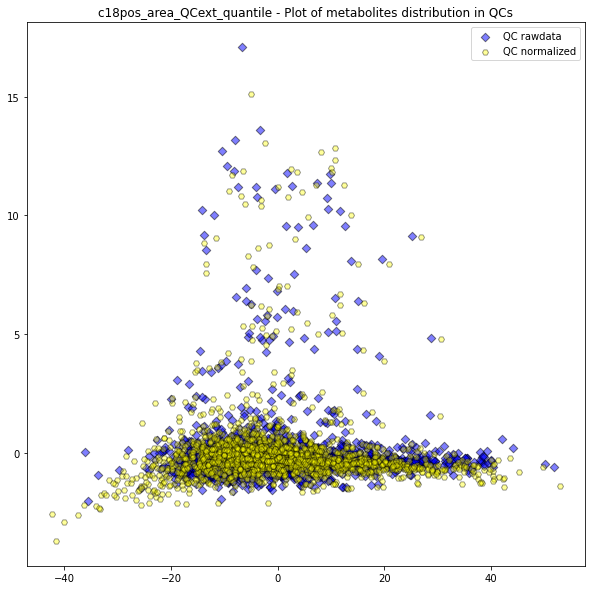

In [75]:
plot_pca_raw_normal(df_pc_qc_raw,'PC1', 'PC2', df_pc_qc_norm, get_file_name(matrix_normalized_file) + ' - Plot of metabolites distribution in QCs', SCATTER_XSIZE, SCATTER_YSIZE, label1 = 'QC rawdata', label2 = 'QC normalized', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_normalized_file), get_file_name(matrix_normalized_file), '_QC_raw_norm', '.svg'))

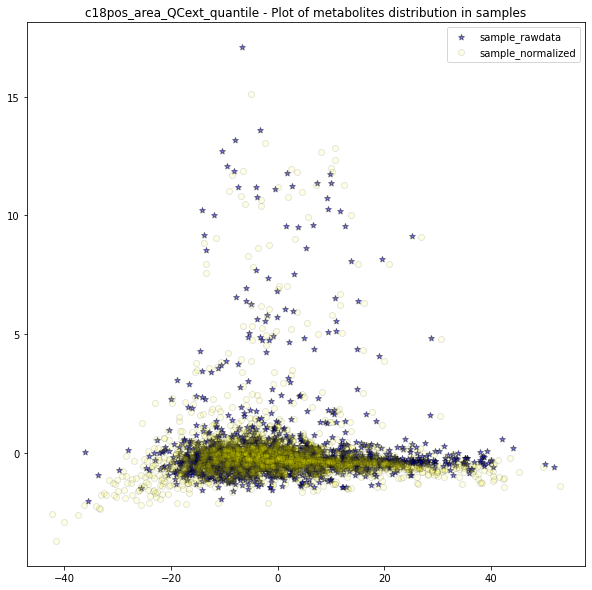

In [76]:
plot_pca_raw_normal(df_pc_sample_raw, 'PC1', 'PC2', df_pc_sample_norm, get_file_name(matrix_normalized_file) + ' - Plot of metabolites distribution in samples', SCATTER_XSIZE, SCATTER_YSIZE, label1 = 'sample_rawdata', label2 = 'sample_normalized', marker1='*', marker2='o', alpha2= 0.1, save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_normalized_file), get_file_name(matrix_normalized_file), '_sample_raw_norm', '.svg'))

#### Comparison between rawdata and data normalized

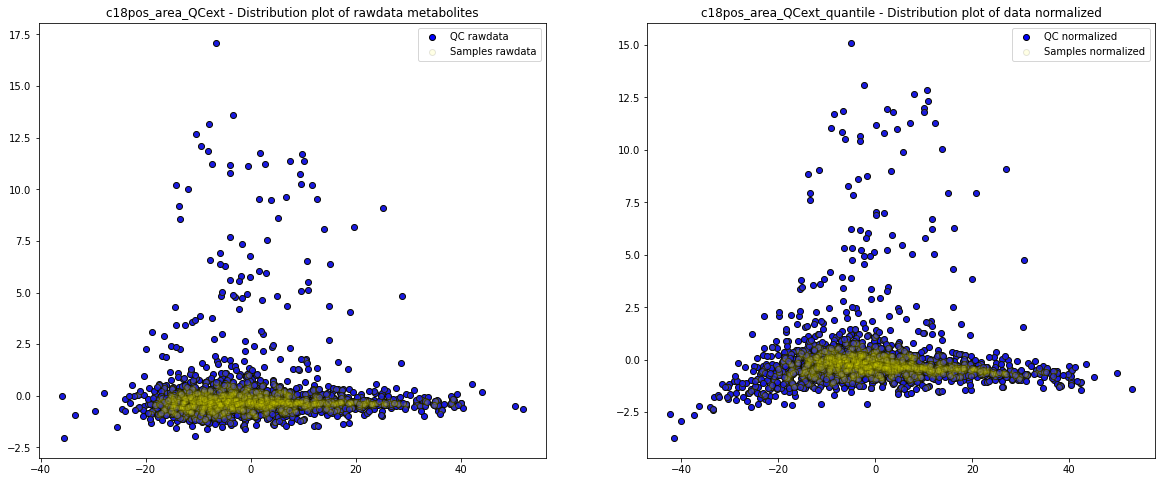

In [77]:
subplots_raw_normalized(df_pc_qc_raw, df_pc_sample_raw, 'PC1', 'PC2', df_pc_qc_norm, df_pc_sample_norm, get_file_name(matrix_rawdata_file) + ' - Distribution plot of rawdata metabolites', get_file_name(matrix_normalized_file) + ' - Distribution plot of data normalized', xsize_fig =20,ysize_fig=  8,
                        label_sc1= 'QC rawdata', label_sc2= 'QC normalized',label_sc3= 'Samples rawdata', label_sc4='Samples normalized', save_fig=SAVE_FIGURE, fig_path=merge_path_filename(get_file_path(matrix_rawdata_file), get_file_name(matrix_rawdata_file), '_all_raw_norm', '.svg'))

In [78]:
matrix_normalized_file.close()
matrix_rawdata_file.close()
json_file.close()